In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle

/home/praba/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PRE-PROCESSING

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.Location.unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [4]:
#lets choose Sydney
df = df[df['Location'] == 'Sydney']

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
#convert date dtype from object --> date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

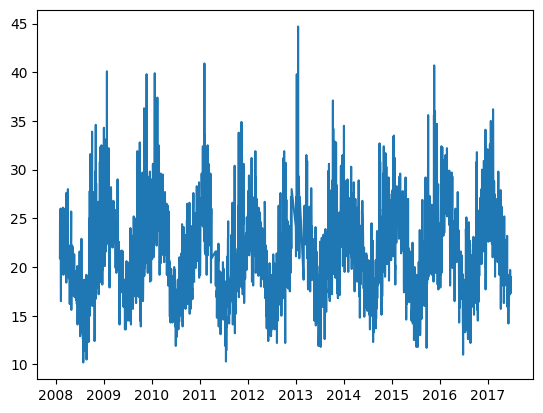

In [8]:
plt.plot(df['Date'],df['Temp3pm'])

In [9]:
coloumns = ['Date','Temp3pm']

In [10]:
df = df[coloumns]

In [11]:
#count of null values
df.isnull().sum()

Date       0
Temp3pm    4
dtype: int64

In [12]:
#drop na values
df.dropna(inplace=True)
df.isnull().sum()

Date       0
Temp3pm    0
dtype: int64

In [13]:
df.columns = ['ds','y']
df.sample(5)

,ds,y
32761,2015-05-29,18.7
32029,2013-05-27,19.4
31887,2012-11-07,22.4
32287,2014-02-09,27.1
31065,2010-07-09,13.9


MODEL TRAINING

In [14]:
model = NeuralProphet()

model.fit(df,epochs=1000,freq='D',early_stopping=True)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (py.warnings._showwarnmsg) - /home/praba/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")

WARNING - (py.warnings._showwarnmsg) - /home/praba/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:758: UserWarning: CUDA initialization: The NVIDIA driver on your system is t

Epoch 42:   4%|▍         | 42/1000 [00:00<00:05, 172.44it/s, loss=0.0341, v_num=4, MAE=2.280, RMSE=3.080, Loss=0.0335, RegLoss=0.000]  


,MAE,RMSE,Loss,RegLoss,epoch
0,46.621353,51.420250,1.892952,0.0,0
1,29.872448,34.833363,1.156842,0.0,1
2,14.443488,18.871412,0.492379,0.0,2
3,5.413313,7.066980,0.124046,0.0,3
4,3.788208,4.840393,0.068085,0.0,4
5,3.141413,4.152442,0.051116,0.0,5
6,2.780788,3.713759,0.043110,0.0,6
7,2.595459,3.508950,0.039368,0.0,7
8,2.473751,3.325444,0.036724,0.0,8
9,2.428796,3.252903,0.035939,0.0,9


In [21]:
forecast = model.make_future_dataframe(df,periods=100)
prediction = model.predict(forecast)
prediction.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 153.75it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2017-06-26,None,17.213207,21.905251,-4.466405,-0.225636
1,2017-06-27,None,17.133265,21.905781,-4.440491,-0.332025
2,2017-06-28,None,17.348618,21.906315,-4.412152,-0.145544
3,2017-06-29,None,17.247545,21.906845,-4.382344,-0.276957
4,2017-06-30,None,18.008514,21.907379,-4.351250,0.452386


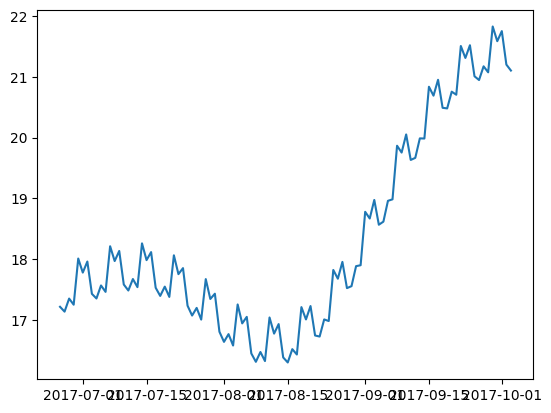

In [22]:
plt.plot(prediction['ds'],prediction['yhat1'])
plt.show()

In [28]:
train = model.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 186.61it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [30]:
df.head()

,ds,y
30176,2008-02-01,20.9
30177,2008-02-02,24.8
30178,2008-02-03,23.0
30179,2008-02-04,20.9
30180,2008-02-05,25.5


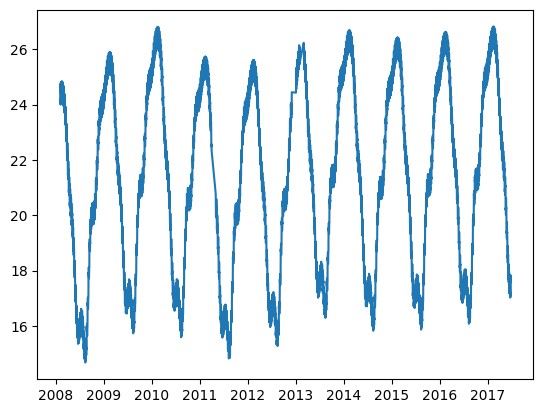

In [33]:
plt.plot(train['ds'],train['yhat1'])
plt.show()